In [24]:
# Importações
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display, clear_output
from concurrent.futures import ThreadPoolExecutor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display_html
from sklearn.tree import export_graphviz, plot_tree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from itertools import combinations
from sklearn import linear_model
from graphviz import Digraph
from sklearn import tree
from scipy import stats
from PyPDF2 import PdfMerger
from joblib import dump, load


import matplotlib.backends.backend_pdf as pltpdf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import dask.dataframe as dd
import graphviz as gv
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import graphviz
import warnings
import os
import re
import time

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [25]:
# Leitura do arquivo CSV em partes (chunks) para otimização de uso de memória
csv_file_path = "DrDoS_UDP.csv"
# Tamanho do chunk (ajuste conforme necessário)
chunk_size = 100000
# Lista para armazenar os chunks
chunks = []
# Iterar sobre o arquivo CSV em chunks e armazenar em uma lista
for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size, low_memory=False):
    chunks.append(chunk)

In [26]:
# Carregue seus dados (substitua 'seus_dados.csv' pelo nome do seu arquivo)
dados = pd.concat(chunks, ignore_index=True)

In [27]:
amostra = dados

In [28]:
dados.columns = dados.columns.str.strip()
display(dados.describe())
print(dados.columns)

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,...,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06,3.136802e+06
mean,6.284729e+04,4.678466e+04,3.326777e+04,1.699073e+01,9.454659e+04,3.769507e+00,5.931838e-03,1.370530e+03,1.257003e+00,3.885615e+02,...,-3.979974e+07,1.441213e+02,5.098763e+01,1.891834e+02,1.061237e+02,2.348633e+03,1.030996e+02,2.454045e+03,2.266851e+03,9.988192e-01
std,3.640744e+04,8.463285e+03,1.865171e+04,3.255629e-01,6.825386e+05,3.745687e+00,6.018696e-01,1.120631e+03,2.431255e+02,4.950828e+01,...,2.017720e+08,5.206479e+04,3.149175e+04,6.879844e+04,4.339355e+04,3.168890e+05,3.667490e+04,3.264913e+05,3.117682e+05,3.434278e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.136800e+04,3.980600e+04,1.715900e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,7.660000e+02,0.000000e+00,3.750000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,6.273600e+04,4.689400e+04,3.329400e+04,1.700000e+01,1.320000e+02,4.000000e+00,0.000000e+00,1.398000e+03,0.000000e+00,3.890000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,9.410400e+04,5.389600e+04,4.942600e+04,1.700000e+01,1.088440e+05,4.000000e+00,0.000000e+00,1.438000e+03,0.000000e+00,3.930000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.325940e+05,6.553100e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.232000e+03,3.610000e+02,5.907600e+04,2.057900e+05,3.547000e+03,...,1.472000e+03,6.151289e+07,4.868047e+07,7.286843e+07,6.151289e+07,1.166865e+08,3.551041e+07,1.166865e+08,1.166865e+08,1.000000e+00


Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [29]:
dados_tr = amostra
dados_tr.reset_index(drop=True, inplace=True)

In [30]:
#amostra2 = dados[dados['Label'].str.contains('BENIGN')]
## Concatenar amostra e amostra2
#dados_tr = pd.concat([amostra, amostra2])

# Redefinir o índice do DataFrame concatenado
#dados_tr.reset_index(drop=True, inplace=True)

In [31]:
# Lista das colunas a serem selecionadas
#colunas_selecionadas = ['Fwd Packet Length Std', 'Packet Length Std', 'Fwd IAT Mean', 'min_seg_size_forward',
#                        'Fwd IAT Max', 'Destination Port', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
#                        'Fwd Packet Length Min', 'Protocol', 'Timestamp', 'Label']

# Lista das colunas a serem selecionadas
colunas_selecionadas = ['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward', 'Destination Port', 'Protocol', 'Timestamp', 'Label']

# Remova espaços em branco dos nomes das colunas
dados_tr.columns = dados_tr.columns.str.strip()

# Encontrando o primeiro e o último horário
primeiro_horario = dados_tr['Timestamp'].min()
ultimo_horario = dados_tr['Timestamp'].max()

print(f"Primeiro horario do ataque: {primeiro_horario}")
print(f"Ultimo horario do ataque: {ultimo_horario}")


# Verifique se todas as colunas selecionadas estão no DataFrame
if set(colunas_selecionadas).issubset(dados_tr.columns):
    # Selecionar apenas as colunas desejadas
    df_dados = dados_tr[colunas_selecionadas]
    # Remover colunas duplicadas
    df_dados = df_dados.loc[:,~df_dados.columns.duplicated()]
    df_dados = df_dados.dropna()

    # Mostrar todas as colunas disponíveis no novo DataFrame
    print("Colunas Selecionadas:")
    print(df_dados.columns)
    print("\n")
    display(df_dados)
else:
    print(dados_tr.columns)
    print(dados_tr)
    print("Nomes das colunas selecionadas não correspondem às colunas no DataFrame.")

Primeiro horario do ataque: 2018-12-01 12:36:57.628026
Ultimo horario do ataque: 2018-12-01 13:04:45.928382
Colunas Selecionadas:
Index(['Fwd Packet Length Mean', 'Fwd IAT Mean', 'min_seg_size_forward',
       'Destination Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')




,Fwd Packet Length Mean,Fwd IAT Mean,min_seg_size_forward,Destination Port,Protocol,Timestamp,Label
0,348.0,43679.000000,-1,6652,17,2018-12-01 12:36:57.628026,DrDoS_UDP
1,349.5,36073.000000,-1,9712,17,2018-12-01 12:36:57.628076,DrDoS_UDP
2,359.5,34859.666667,-1,4680,17,2018-12-01 12:36:57.628164,DrDoS_UDP
3,386.0,36989.000000,-1,2644,17,2018-12-01 12:36:57.628166,DrDoS_UDP
4,383.0,1.000000,-1,16901,17,2018-12-01 12:36:57.628217,DrDoS_UDP
...,...,...,...,...,...,...,...
3136797,401.0,2.000000,20,6479,17,2018-12-01 13:04:45.928050,DrDoS_UDP
3136798,401.0,1.000000,20,33462,17,2018-12-01 13:04:45.928055,DrDoS_UDP
3136799,321.0,2.000000,20,22593,17,2018-12-01 13:04:45.928173,DrDoS_UDP
3136800,375.0,2.000000,20,46618,17,2018-12-01 13:04:45.928225,DrDoS_UDP


# Classifier comparison

In [32]:
# Converta a coluna 'Timestamp' para objetos datetime
df_dados['Timestamp'] = pd.to_datetime(df_dados['Timestamp'])

# Calcule o número de segundos desde a época Unix
df_dados['Timestamp_seconds'] = (df_dados['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Preparar os dados
X = df_dados.drop(['Label', 'Timestamp', 'Timestamp_seconds'], axis=1)  # Remova também a coluna 'Timestamp_seconds'
y = df_dados['Label']


# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verifique se a coluna 'Timestamp_seconds' não está em X_test
assert 'Timestamp_seconds' not in X_train.columns
assert 'Timestamp_seconds' not in X_test.columns

In [33]:
# Encontrando o primeiro e o último horário
primeiro_horario = df_dados['Timestamp'].min()
ultimo_horario = df_dados['Timestamp'].max()

print(f"Primeiro horario do ataque: {primeiro_horario}")
print(f"Ultimo horario do ataque: {ultimo_horario}")

Primeiro horario do ataque: 2018-12-01 12:36:57.628026
Ultimo horario do ataque: 2018-12-01 13:04:45.928382


In [34]:
# Árvore de decisão
dt = DecisionTreeClassifier(max_depth=5)

In [35]:
# Treinar a árvore de decisão
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
# Salvando o modelo
dump(dt, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [37]:
# Capturar o tempo de início de predição da Árvore de decisão
tempo_inicio = time.time()

# Fazer previsões com a Árvore de Decisão
y_pred_dt = dt.predict(X_test)

# Capturar o tempo de término de predição da Árvore de Decisão
tempo_fim = time.time()

# Calcular o tempo de predição em segundos
prediction_time = tempo_fim - tempo_inicio

# Calcular o tempo de predição por amostra em segundos
tempo_por_amostra = prediction_time / len(X_test)

print(f"Tempo de predição total da Árvore de Decisão: {prediction_time:.10f} segundos")

print(f"Tempo de predição por amostra da Árvore de Decisão: {tempo_por_amostra} segundos")

Tempo de predição total da Árvore de Decisão: 0.0369985104 segundos
Tempo de predição por amostra da Árvore de Decisão: 4.717988163840364e-08 segundos


In [38]:
print('')
print('Árvore de decisão:')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Árvore de decisão:
              precision    recall  f1-score   support

      BENIGN       0.96      0.94      0.95       531
   DrDoS_UDP       1.00      1.00      1.00    783670

    accuracy                           1.00    784201
   macro avg       0.98      0.97      0.98    784201
weighted avg       1.00      1.00      1.00    784201

[[   500     31]
 [    21 783649]]


In [39]:
# Calcula a taxa de acerto

dt_accuracy = accuracy_score(y_test, y_pred_dt)

print('')
print('Árvore de decisão:')
print(dt_accuracy)


Árvore de decisão:
0.9999336904696627


In [40]:
# Avalia o desempenho do modelo

dt_precision = precision_score(y_test, y_pred_dt, pos_label='BENIGN', average='binary')
dt_recall = recall_score(y_test, y_pred_dt, pos_label='BENIGN', average='binary')
dt_f1 = f1_score(y_test, y_pred_dt, pos_label='BENIGN', average='binary')

print(f"Acurácia: {dt_accuracy:.4f}")
print(f"Precisão: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

Acurácia: 0.9999
Precisão: 0.9597
Recall: 0.9416
F1-Score: 0.9506


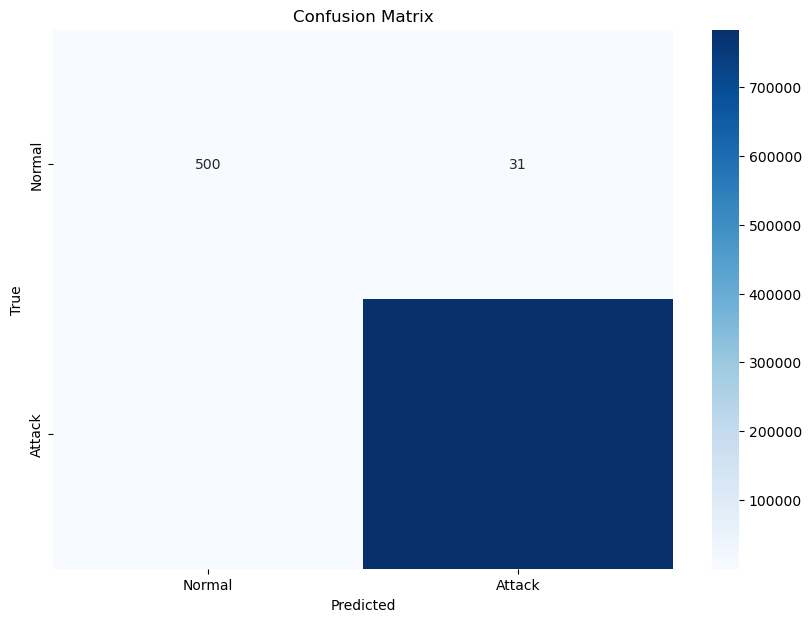

In [41]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_dt)

# Plot da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Exportar e salvar a árvore usando graphviz
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=dt.classes_.astype(str),  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'